# Unit test for staNMF

In [1]:
from staNMF import instability
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
n, d, K = 100, 100, 10
D = np.maximum(np.random.normal(size = (n, K)),0)
A = np.maximum(np.random.normal(size = (K, d)),0)
X = D @ A + np.random.normal(0, .1, size = (n,d))
mask = np.random.choice([0, 1], p=[.9, .1], size = (n, d))
masked_X = X - 1000 * mask 

In [3]:
ins = instability(masked_X.T, n_trials=10, folder_name='tmp', random_state=1000)

In [4]:
Ks = list(range(6, 15))
output = ins.fit_transform(Ks, parallel = True)
output

array([[8.25474173e-02, 2.77829153e-02],
       [8.02307581e-02, 2.88876297e-02],
       [6.29483196e-02, 2.82048434e-02],
       [5.39586949e-02, 1.79563961e-02],
       [2.28240849e-07, 6.23055297e-08],
       [2.98358310e-02, 1.06914420e-02],
       [5.90059061e-02, 1.17293124e-02],
       [8.00017438e-02, 1.63602776e-02],
       [8.50172510e-02, 1.21277336e-02]])

Text(0.5, 1.0, 'instability for different Ks')

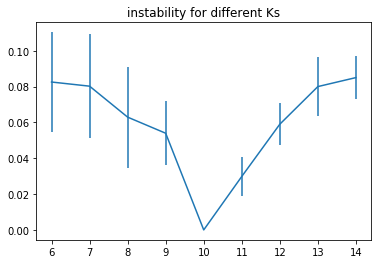

In [5]:
plt.errorbar(x = Ks, y = output[:,0], yerr=output[:,1])
plt.title('instability for different Ks')

## test parallel

In [6]:
%timeit ins.fit_parallel(Ks, len(Ks)//2)

2.99 s ± 51.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit ins.fit(Ks)

6.09 s ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
